In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wind-solar-electricity-production/intermittent-renewables-production-france.csv


In [2]:
power=pd.read_csv("/kaggle/input/wind-solar-electricity-production/intermittent-renewables-production-france.csv")
power

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22 20:00:00+02:00,2020-07-22,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July
1,2020-07-23 07:00:00+02:00,2020-07-23,07:00:00,08:00:00,Solar,223.0,205,Thursday,July
2,2020-07-23 16:00:00+02:00,2020-07-23,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July
3,2020-07-23 19:00:00+02:00,2020-07-23,19:00:00,20:00:00,Solar,658.0,205,Thursday,July
4,2020-07-23 23:00:00+02:00,2020-07-23,23:00:00,24:00:00,Solar,0.0,205,Thursday,July
...,...,...,...,...,...,...,...,...,...
59801,2023-06-30 06:00:00+02:00,2023-06-30,06:00:00,07:00:00,Solar,55.0,181,Friday,June
59802,2023-06-30 13:00:00+02:00,2023-06-30,13:00:00,14:00:00,Solar,4554.0,181,Friday,June
59803,2023-06-30 14:00:00+02:00,2023-06-30,14:00:00,15:00:00,Solar,4589.0,181,Friday,June
59804,2023-06-30 16:00:00+02:00,2023-06-30,16:00:00,17:00:00,Solar,4173.0,181,Friday,June


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

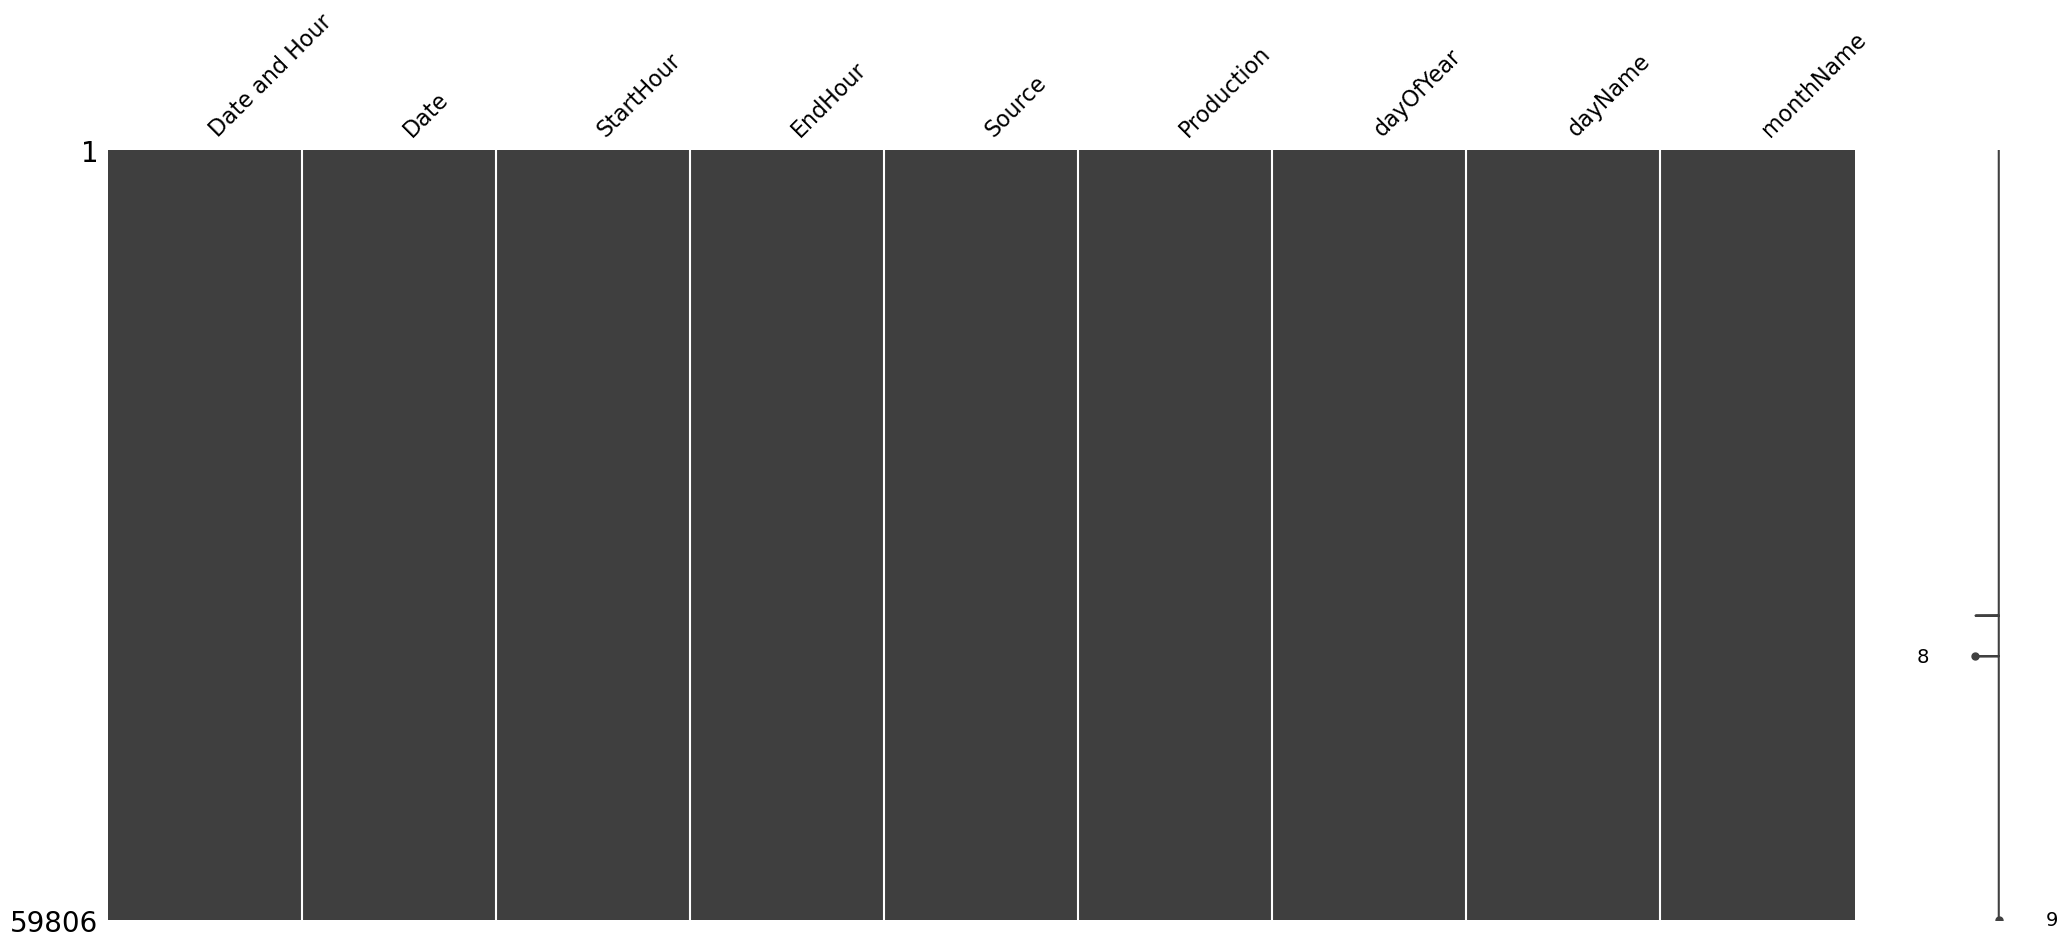

In [3]:
import missingno as msno
msno.matrix(power)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the DataFrame to get an overview of the data
print(power.head())



               Date and Hour        Date StartHour   EndHour Source  \
0  2020-07-22 20:00:00+02:00  2020-07-22  20:00:00  21:00:00  Solar   
1  2020-07-23 07:00:00+02:00  2020-07-23  07:00:00  08:00:00  Solar   
2  2020-07-23 16:00:00+02:00  2020-07-23  16:00:00  17:00:00  Solar   
3  2020-07-23 19:00:00+02:00  2020-07-23  19:00:00  20:00:00  Solar   
4  2020-07-23 23:00:00+02:00  2020-07-23  23:00:00  24:00:00  Solar   

   Production  dayOfYear    dayName monthName  
0       244.0        204  Wednesday      July  
1       223.0        205   Thursday      July  
2      2517.0        205   Thursday      July  
3       658.0        205   Thursday      July  
4         0.0        205   Thursday      July  


In [5]:
# Check the basic statistics of the numeric columns
print(power.describe())



         Production     dayOfYear
count  59804.000000  59806.000000
mean    2792.859775    172.454720
std     3190.239316    104.937607
min        0.000000      1.000000
25%       42.000000     84.000000
50%     1871.000000    164.000000
75%     4053.250000    262.000000
max    17220.000000    366.000000


In [6]:
# Check data types and missing values
print(power.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59806 entries, 0 to 59805
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Hour  59806 non-null  object 
 1   Date           59806 non-null  object 
 2   StartHour      59806 non-null  object 
 3   EndHour        59806 non-null  object 
 4   Source         59806 non-null  object 
 5   Production     59804 non-null  float64
 6   dayOfYear      59806 non-null  int64  
 7   dayName        59806 non-null  object 
 8   monthName      59806 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 4.1+ MB
None


# **EDA Plots**

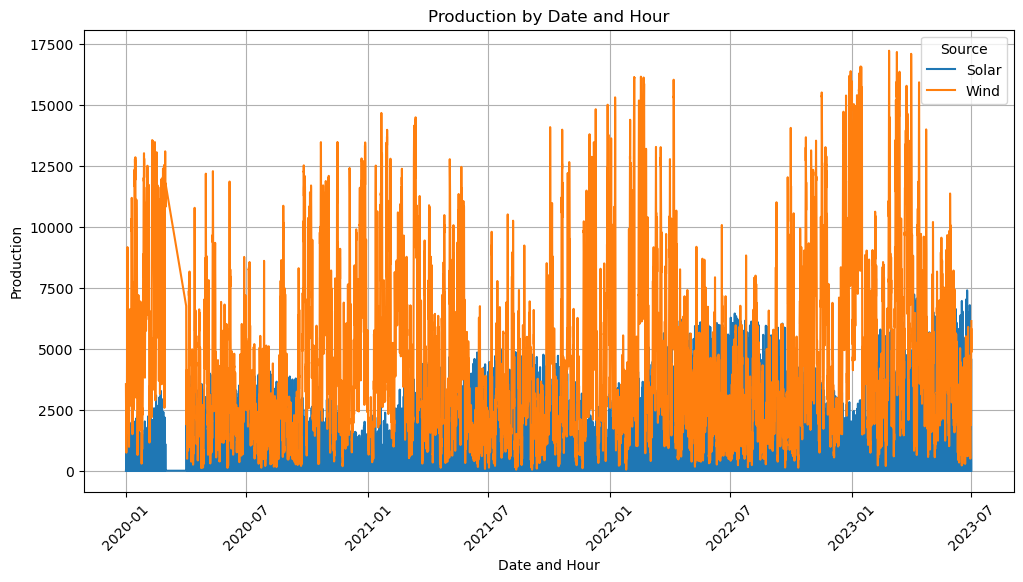

In [7]:
# Let's convert the 'Date and Hour' column to a proper datetime object
power['Date and Hour'] = pd.to_datetime(power['Date and Hour'])


# Plot Production by Date and Hour
plt.figure(figsize=(12, 6))
sns.lineplot(data=power, x='Date and Hour', y='Production', hue='Source')
plt.title('Production by Date and Hour')
plt.xlabel('Date and Hour')
plt.ylabel('Production')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

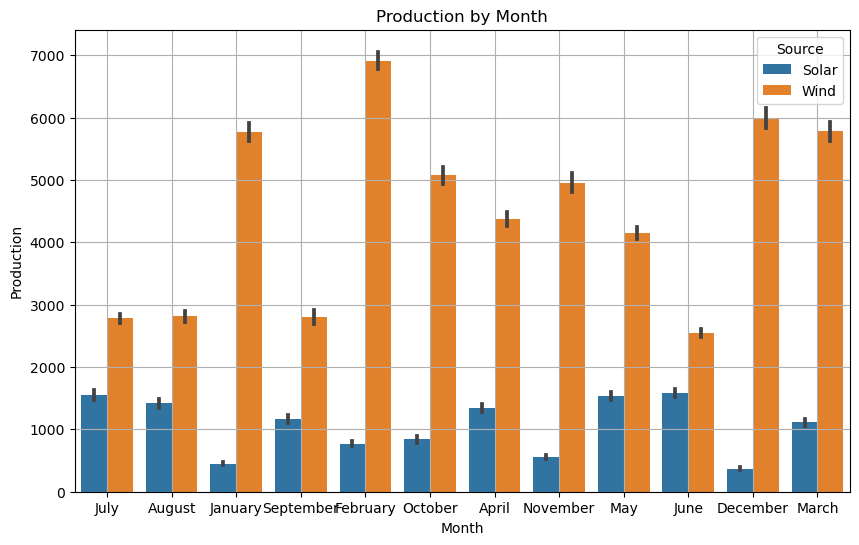

In [8]:
# Plot Production by Month
plt.figure(figsize=(10, 6))
sns.barplot(data=power, x='monthName', y='Production', hue='Source')
plt.title('Production by Month')
plt.xlabel('Month')
plt.ylabel('Production')
plt.grid(True)
plt.show()



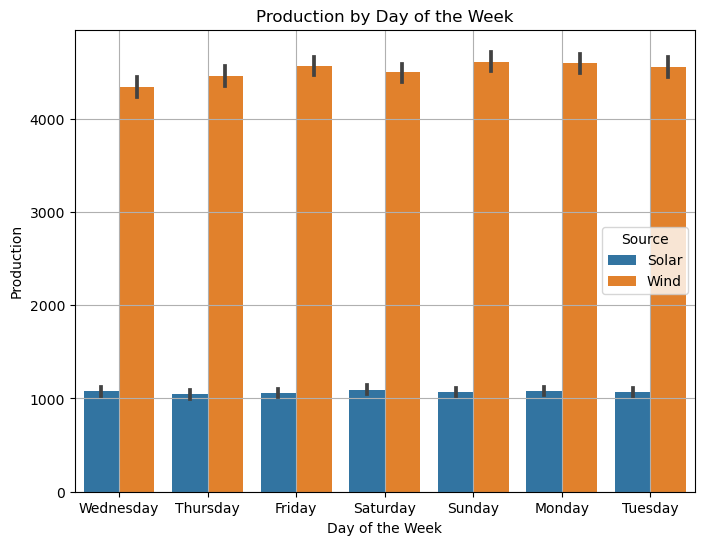

In [9]:
# Plot Production by Day of the Week
plt.figure(figsize=(8, 6))
sns.barplot(data=power, x='dayName', y='Production', hue='Source')
plt.title('Production by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Production')
plt.grid(True)
plt.show()



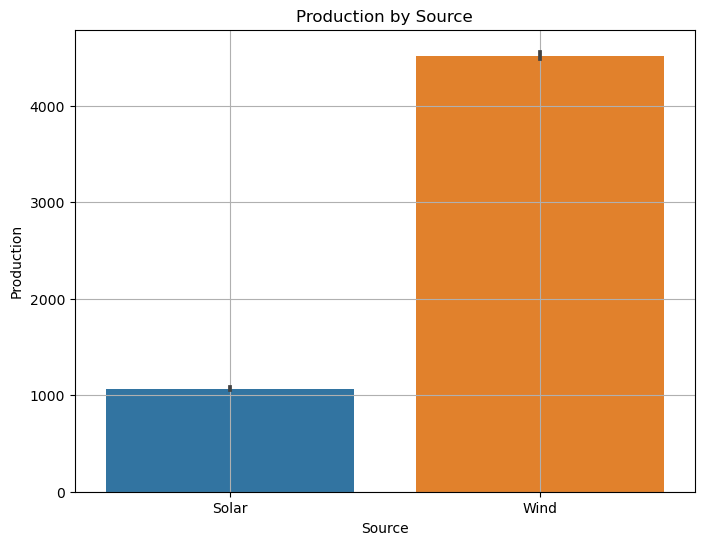

In [10]:
# Plot Production by Source
plt.figure(figsize=(8, 6))
sns.barplot(data=power, x='Source', y='Production')
plt.title('Production by Source')
plt.xlabel('Source')
plt.ylabel('Production')
plt.grid(True)
plt.show()



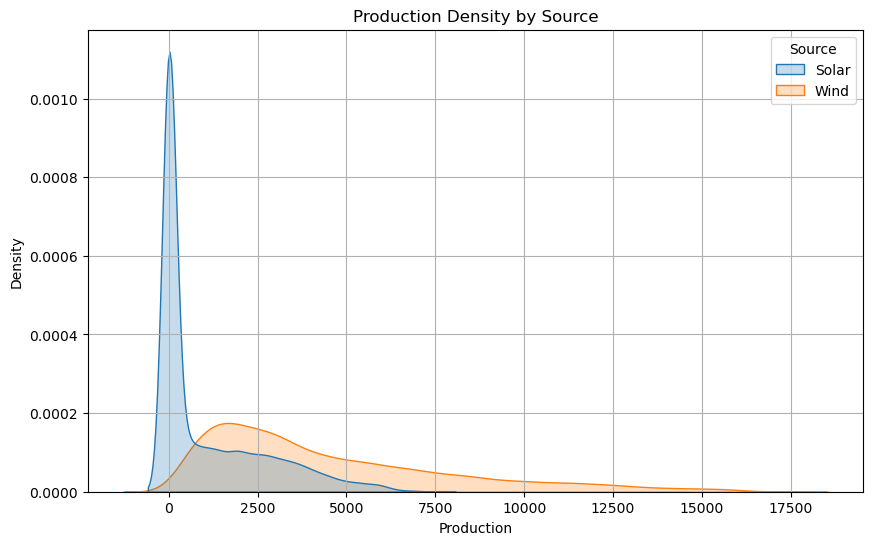

In [11]:
# Plot Production Density by Source
plt.figure(figsize=(10, 6))
sns.kdeplot(data=power, x='Production', hue='Source', fill=True, common_norm=False)
plt.title('Production Density by Source')
plt.xlabel('Production')
plt.grid(True)
plt.show()



/tmp/ipykernel_20/1880094197.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(power.corr(), annot=True, cmap='coolwarm', fmt=".2f")


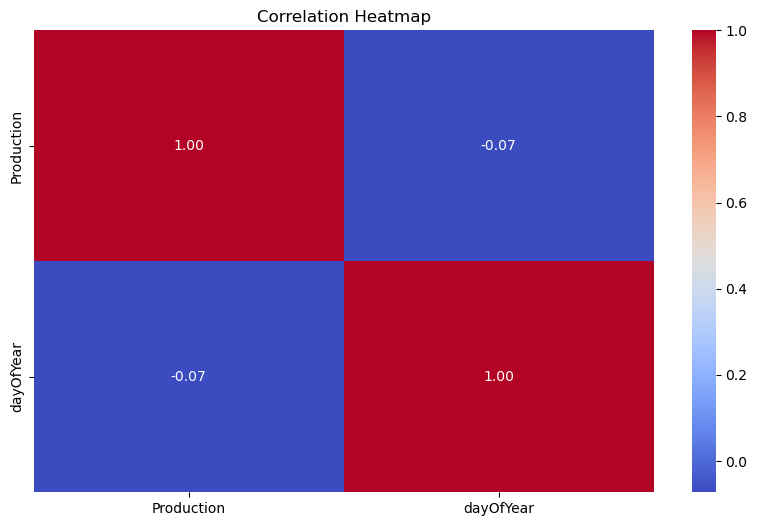

In [12]:
# Correlation Heatmap of Numeric Variables
plt.figure(figsize=(10, 6))
sns.heatmap(power.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Hypothesis:** 

> The average electricity production from solar and wind sources is significantly different.

**Null Hypothesis (H0):** 

> The average electricity production from solar and wind sources is the same.
Alternative Hypothesis (H1): The average electricity production from solar and wind sources is different.

**We will perform a two-sample t-test to compare the means of the production values for solar and wind sources.**

In [13]:
import scipy.stats as stats

# Perform hypothesis analysis
solar_production = power[power['Source'] == 'Solar']['Production']
wind_production = power[power['Source'] == 'Wind']['Production']

# Two-sample t-test
t_stat, p_value = stats.ttest_ind(solar_production, wind_production)

# Set the significance level (alpha)
alpha = 0.05

print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

if p_value < alpha:
    print("Reject Null Hypothesis. There is a significant difference in average production between Solar and Wind sources.")
else:
    print("Fail to Reject Null Hypothesis. There is no significant difference in average production between Solar and Wind sources.")


T-Statistic: nan
P-Value: nan
Fail to Reject Null Hypothesis. There is no significant difference in average production between Solar and Wind sources.


# **Logistic Regression**

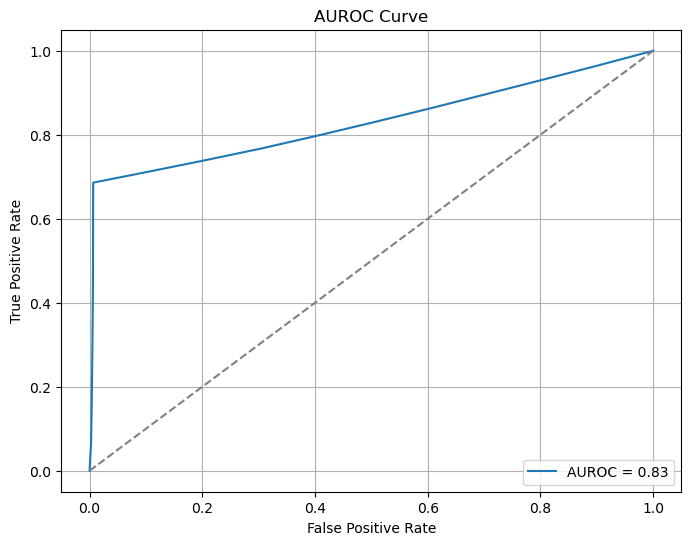

Cross-Validation AUROC Scores: [0.8648379  0.83806134 0.84408856 0.82582381 0.82080526 0.85629022
 0.83540679 0.82808229 0.86391454 0.82036657]
Mean AUROC: 0.8397677271324285
Confusion Matrix:
 [[16255   104]
 [13647 29800]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.99      0.70     16359
           1       1.00      0.69      0.81     43447

    accuracy                           0.77     59806
   macro avg       0.77      0.84      0.76     59806
weighted avg       0.87      0.77      0.78     59806



In [14]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Create a binary target variable based on a threshold (e.g., 200 units)
threshold = 200
power['Target'] = np.where(power['Production'] >= threshold, 1, 0)

# Encode the 'Source' column
label_encoder = LabelEncoder()
power['Source_Encoded'] = label_encoder.fit_transform(power['Source'])

# Prepare features and target variables
X = power[['Source_Encoded']]
y = power['Target']

# Initialize the Logistic Regression classifier
clf = LogisticRegression()

# Perform 10-fold cross-validation and get predicted probabilities for AUROC
predicted_probabilities = cross_val_predict(clf, X, y, cv=10, method='predict_proba')[:, 1]

# Compute AUROC
auroc = roc_auc_score(y, predicted_probabilities)

# Plot the AUROC curve
fpr, tpr, thresholds = roc_curve(y, predicted_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUROC = {auroc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Perform 10-fold cross-validation and get classification metrics
cv_scores = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
conf_matrix = confusion_matrix(y, cross_val_predict(clf, X, y, cv=10))
classification_rep = classification_report(y, cross_val_predict(clf, X, y, cv=10))

print("Cross-Validation AUROC Scores:", cv_scores)
print("Mean AUROC:", np.mean(cv_scores))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
